# Lab 4: Exictation and ionization

We have a bunch of csv files that we can 

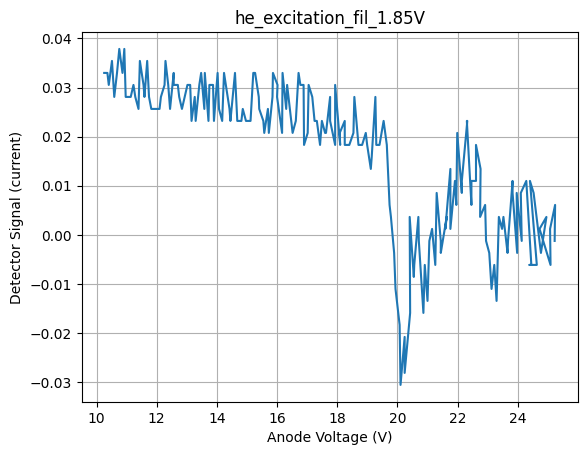

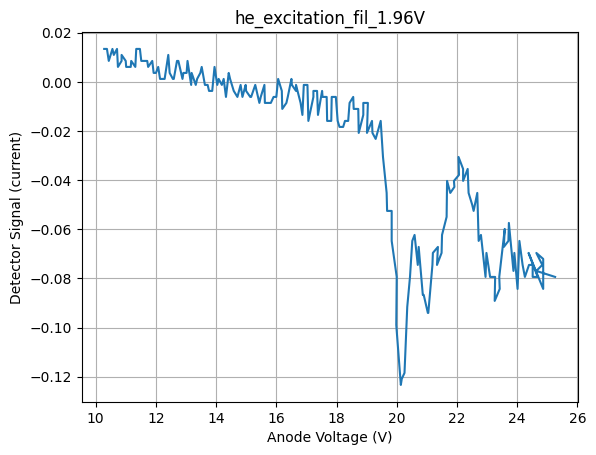

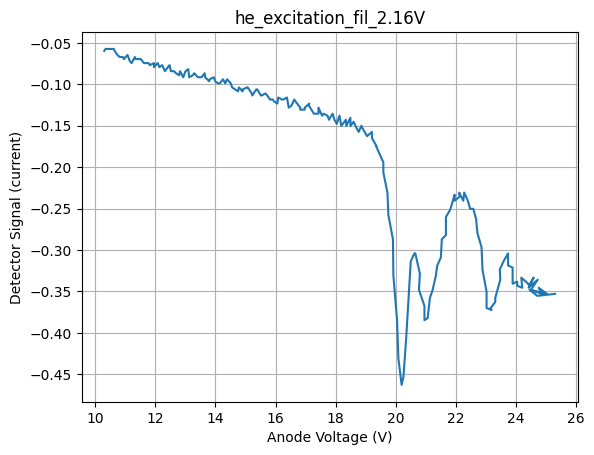

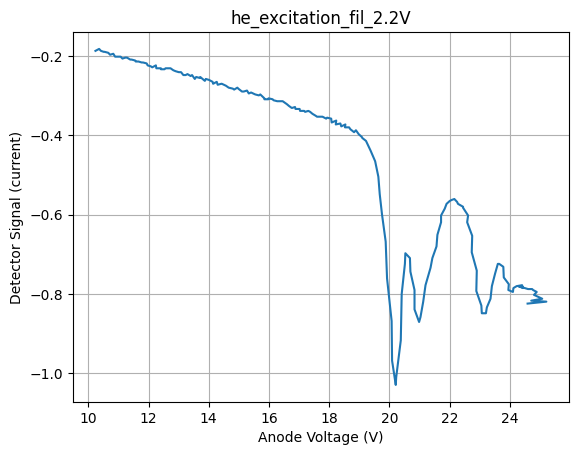

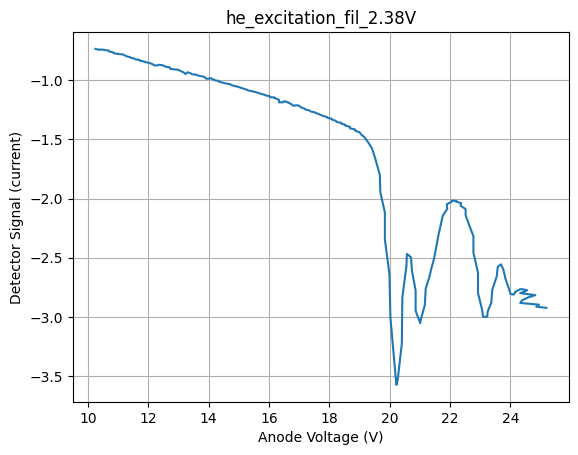

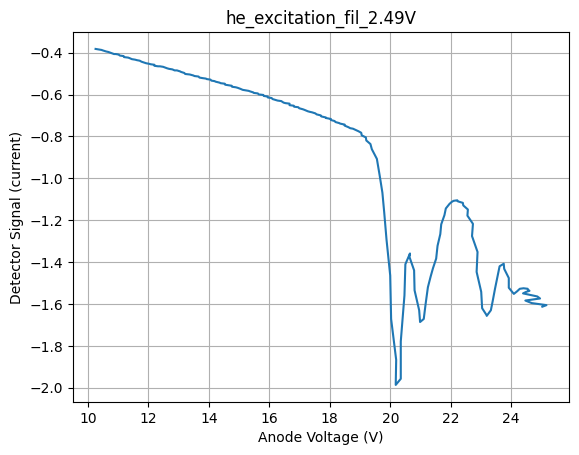

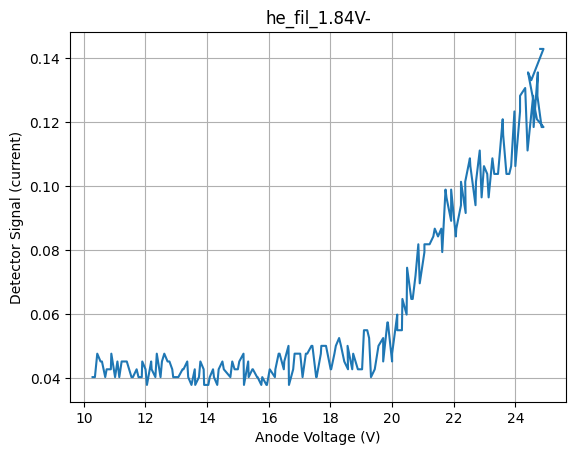

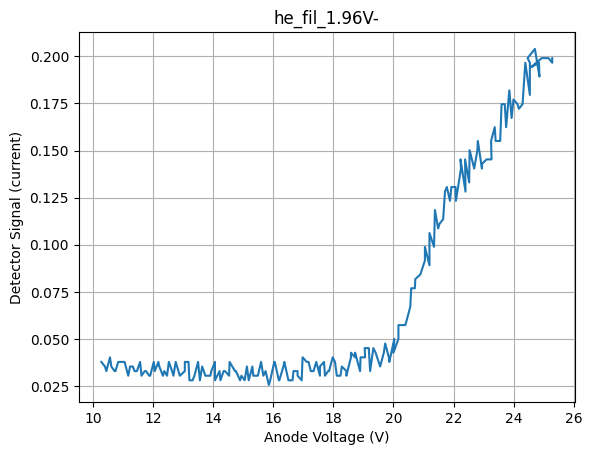

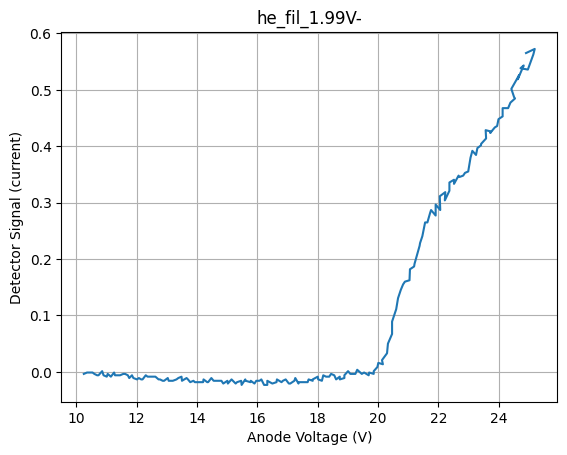

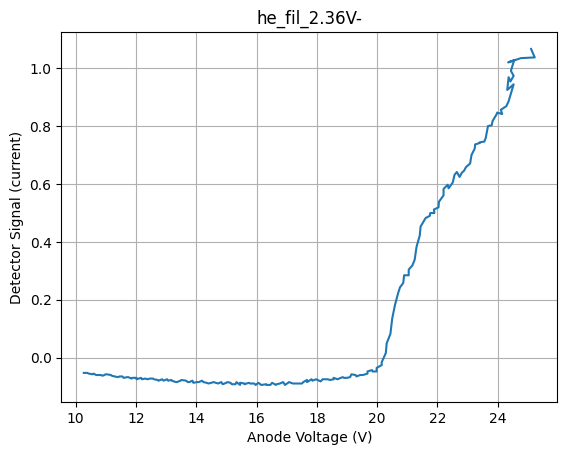

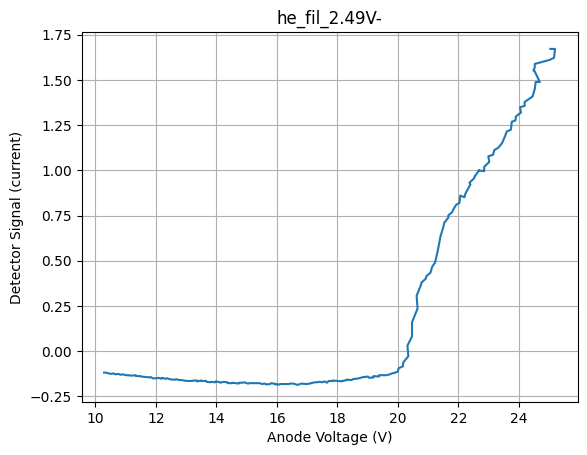

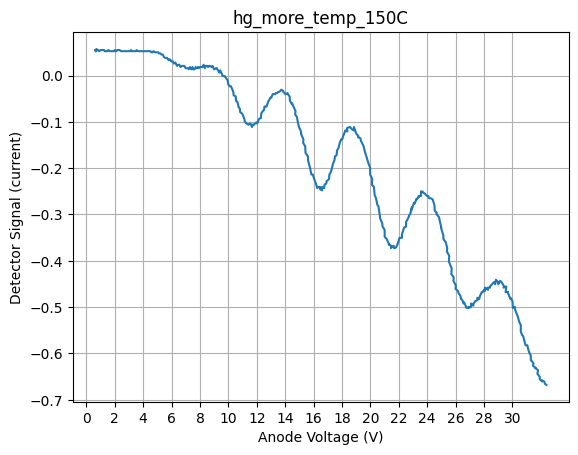

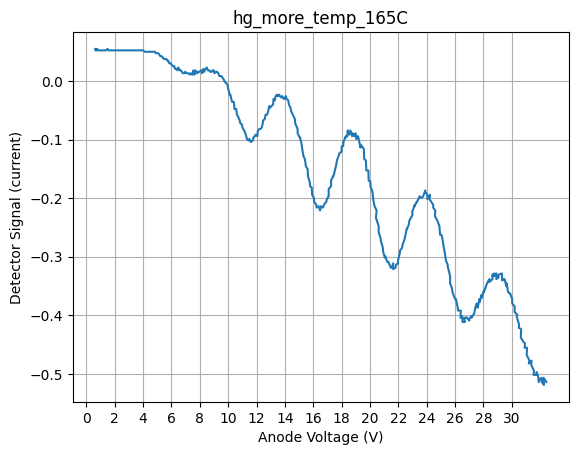

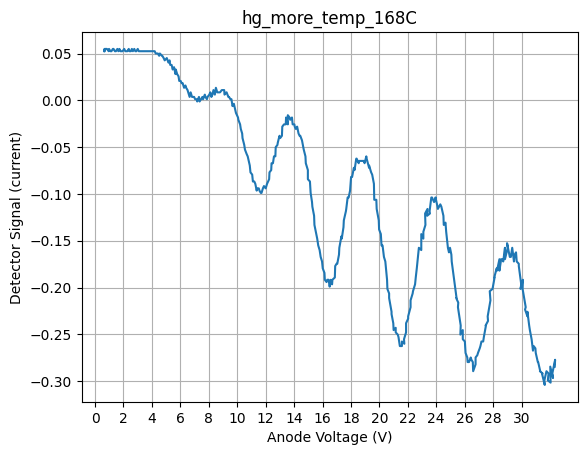

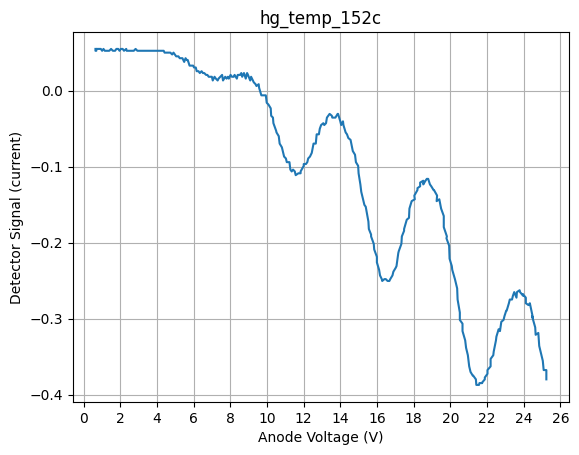

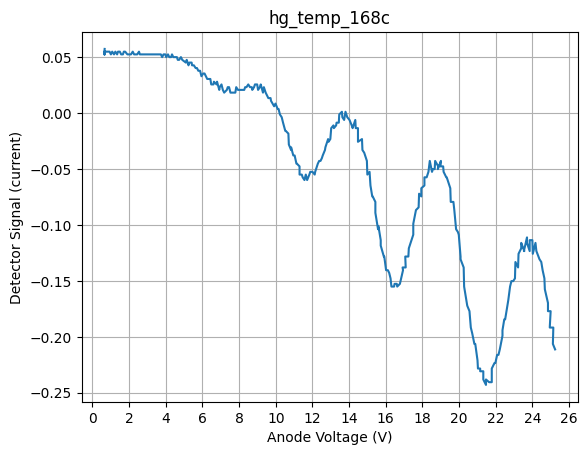

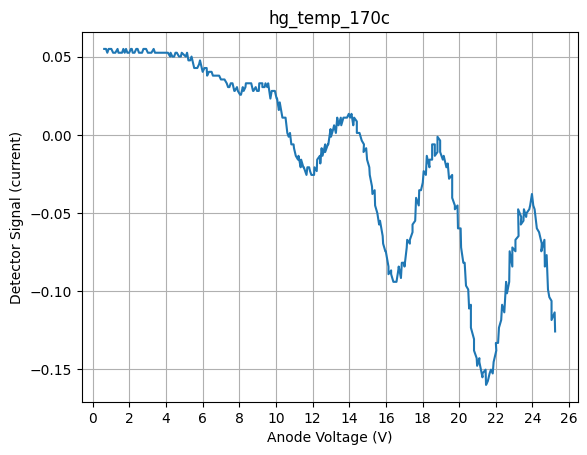

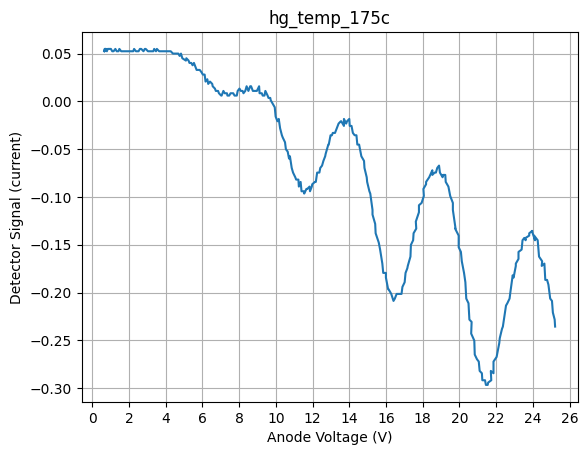

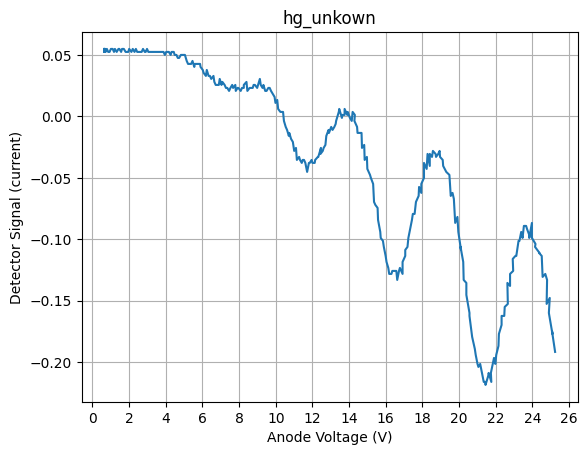

In [1]:
import csv
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

parent_folder = "C:/Users/trist/Documents/Code/Vs_Code_Projects/python/jr_lab/lab4/"
datas:dict[str, list] = {}
files = os.listdir(parent_folder)

for filename in files:
    with open(parent_folder+filename, newline='') as csvfile:
        data = csv.reader(csvfile, delimiter='\t', quoting = csv.QUOTE_NONNUMERIC)
        datas[filename] = list(data)

for file in files:
    # print(file)
    e = np.transpose(np.array(datas[file]))
    plt.title(file)
    x = e[0]
    y = e[1]
    # print(x)
    # print(y)
    plt.ylabel("Detector Signal (current)")
    plt.xlabel("Anode Voltage (V)")
    plt.xticks(np.linspace(0, 30, 16))
    plt.grid(True)
    plt.plot(x, y)
    plt.show()

In [2]:
hg1s = [7, 7.2, 7, 7.1, 7.3, 8, 7.1, 7.7]
hg2s = [11.5, 11.8, 11.8, 11.8, 11.8, 12, 11.2, 11.8]
hg3s = [16.4, 16.4, 16.5, 16.3, 16.5, 16.5, 16.7]
hg4s = [21.5, 21.7, 21.8, 21.6, 21.7, 21.5, 21.5, 21.5]
hg5s = [26.8, 26.8, 26.7]

hg1 = np.average(hg1s)
hg2 = np.average(hg2s)
hg3 = np.average(hg3s)
hg4 = np.average(hg4s)
hg5 = np.average(hg5s)

hg1_unc = np.std(hg1s)
hg2_unc = np.std(hg2s)
hg3_unc = np.std(hg3s)
hg4_unc = np.std(hg4s)
hg5_unc = np.std(hg5s)

print(f"hg1 = {hg1:.3f} +/- {hg1_unc:.3f}")
print(f"hg2 = {hg2:.3f} +/- {hg2_unc:.3f}")
print(f"hg3 = {hg3:.3f} +/- {hg3_unc:.3f}")
print(f"hg4 = {hg4:.3f} +/- {hg4_unc:.3f}")
print(f"hg5 = {hg5:.3f} +/- {hg5_unc:.3f}")

hgs = [hg1,hg2,hg3,hg4,hg5]
hgs_unc = [hg1_unc,hg2_unc,hg3_unc,hg4_unc,hg5_unc]


print(np.diff(hgs))
print(f"{np.average(np.diff(hgs))} +/- {np.std(np.diff(hgs))}")

hg1 = 7.300 +/- 0.339
hg2 = 11.713 +/- 0.232
hg3 = 16.471 +/- 0.116
hg4 = 21.600 +/- 0.112
hg5 = 26.767 +/- 0.047
[4.4125     4.75892857 5.12857143 5.16666667]
4.866666666666666 +/- 0.3067853331667898


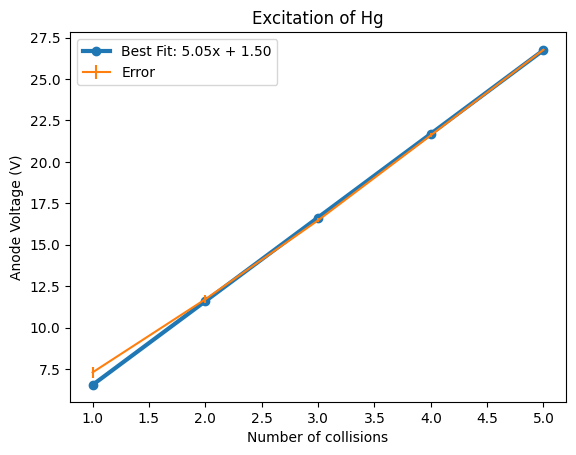

The value of b for the best fit line is 1.5.
The value of m for the best fit line is 5.0.
0.39610947138097374
The uncertainty of b for the best fit line is 0.2.
The uncertainty of m for the best fit line is 0.044.


In [8]:
from typing import Callable
import matplotlib.pyplot as plt

def mean(xs:list[float]) -> float:
    s = sum([x for x in xs]) # list comprehension will follow the pattern and the sum just adds
    N = len(xs) # length of xs
    return s/N

def std(xs:list[float]) -> float:
    xbar = mean(xs)
    s = sum([(x-xbar)**2 for x in xs])
    N = len(xs)
    return np.sqrt(s/(N-1)) # we use N-1 for the bias corrected version

# All of these functions are just python trnascripts of the functions above.

# this function is the DELTA in the formula
def delta(xs, ys, stds) -> float: 
    a = sum([1/sig**2 for sig in stds])
    b = sum([x**2/sig**2 for sig, x in zip(stds, xs)])
    c = sum([x/sig**2 for sig, x in zip(stds, xs)])
    return a*b - c**2

# this calculates the m hat in the formula
def m_fit(xs, ys, stds) -> float:
    a = sum([1/sig**2 for sig in stds])
    b = sum([x*y/sig**2 for x, y, sig in zip(xs,ys,stds)])
    c = sum([x/sig**2 for x, sig in zip(xs,stds)])
    d = sum([y/sig**2 for y, sig in zip(ys,stds)])
    return (a*b - c*d)/delta(xs, ys, stds)
    
# this calculates the b hat in the formula
def b_fit(xs, ys, stds) -> float:
    a = sum([x**2/sig**2 for x, sig in zip(xs, stds)])
    b = sum([y/sig**2 for y, sig in zip(ys,stds)])
    c = sum([x/sig**2 for x, sig in zip(xs,stds)])
    d = sum([x*y/sig**2 for x, y, sig in zip(xs,ys,stds)])
    return (a*b - c*d)/delta(xs, ys, stds)

# returns a function in the form f(x) = mx + b
def fit_line(xs, ys, stds) -> Callable:
    m = m_fit(xs,ys,stds)
    b = b_fit(xs,ys,stds)
    f = lambda x: m*x + b
    return f

# uncertainty in b
def sigma_m(xs, ys, stds) -> float:
    a = sum([1/sig**2 for sig in stds])
    return np.sqrt(a/delta(xs, ys, stds))

# uncertainty in m
def sigma_b(xs, ys, stds) -> float:    
    a = sum([x**2/sig**2 for x, sig in zip(xs, stds)])
    return np.sqrt(a/delta(xs, ys, stds))

x = np.array([1,2,3,4,5])
y = hgs
stds = hgs_unc
args = (x, y, stds)
f = fit_line(*args)
m = m_fit(*args)
b = b_fit(*args)

plt.plot(x, f(x), "-o",  linewidth=3)
plt.errorbar(x, y, stds)
plt.title("Excitation of Hg")
plt.legend([f"Best Fit: {m:.2f}x + {b:.2f}", "Error"])
plt.xlabel("Number of collisions")
plt.ylabel("Anode Voltage (V)")
plt.show()

print(f"The value of b for the best fit line is {b_fit(x, y, stds):.2}.")
print(f"The value of m for the best fit line is {m_fit(x, y, stds):.2}.")
m = m_fit(x, y, stds)
print(2*1/m)

print(f"The uncertainty of b for the best fit line is {sigma_b(x, y, stds):.2}.")
print(f"The uncertainty of m for the best fit line is {sigma_m(x, y, stds):.2}.")

In [4]:
excite1s = [20.1, 20.1, 20.2, 20.2, 20.2, 20.2]
excite2s = [20.9, 21.1, 21.1, 21, 21, 21.1]
excite3s = [23.3, 23.3, 23.2, 23.1, 23.2, 23.2]
excite4s = [24, 24.1, 24, 24, 24.1]

excite1 = np.average(excite1s)
excite2 = np.average(excite2s)
excite3 = np.average(excite3s)
excite4 = np.average(excite4s)

print([excite1, excite2, excite3, excite4])

print(((excite1-19.82)/19.82).__format__(".3%"))
print(((excite2-20.62)/20.62).__format__(".3%"))
print(((excite3-21)/21).__format__(".3%"))
print(((excite4-21.2)/21.2).__format__(".3%"))



[20.166666666666668, 21.03333333333333, 23.21666666666667, 24.04]
1.749%
2.005%
10.556%
13.396%


In [5]:
ionizations = [20, 20.1, 19.9, 20.1, 20.2]
ion_avg = np.average(ionizations)
print(ion_avg)

20.06
